In [1]:
from src.models.module3 import* # import all functins 

We want to check if the follwoing formula for the associated Legendre function works:
$$
P_{l,-m}(x) = (-1)^m \frac{(l-m)!}{(l+m)!}P_{lm}(x)\tag{1}
$$

1. For a scalar input:

In [2]:
# We want to test whether the defined function P_lm fulfils the conditions of Eq.1, when the input x is a scalar
m = 2
l = 3
x = 2.
func1 = P_lm(x,l,-m) # negative m
func2 = (-1)**m*factorial(l-m)/factorial(l+m)*P_lm(x,l,m) # positive m

assert round(func1, 3) == round(func2,3)
print(f'Result from P_l,-m, for m={m}, l={l} and x={x}, output:{func1:.2f}')
print(f'Result from P_l,m with the adaptive factor, for m={m}, l={l} and x={x}, output:{func1:.2f}')

Result from P_l,-m, for m=2, l=3 and x=2.0, output:-0.75
Result from P_l,m with the adaptive factor, for m=2, l=3 and x=2.0, output:-0.75


2. For a vactor input:

In [3]:
m = 2
l = 3
x = jnp.array([-1.,1.,2.])
func1 = P_lm(x, l, -m) # negative m
func2 = (-1)**m*factorial(l-m)/factorial(l+m)*P_lm(x,l,m)

assert jnp.allclose(func1, func2)
print(f'Result from P_l,-m, for m={m}, l={l} and x={x}, output:{func1}')
print(f'Result from P_l,m with the adaptive factor, for m={m}, l={l} and x={x}, output:{func1}')

Result from P_l,-m, for m=2, l=3 and x=[-1.  1.  2.], output:[-0.          0.         -0.75000006]
Result from P_l,m with the adaptive factor, for m=2, l=3 and x=[-1.  1.  2.], output:[-0.          0.         -0.75000006]


The function `jax.numpy.allclose` checks if two given arrays are element-wise approximately equal, see [`jax.numpy.allclose`](https://docs.jax.dev/en/latest/_autosummary/jax.numpy.allclose.html)

Another property that we want to test, for the standard spherical function $Y_{lm}$, which is inherent to Eq. 1, is the following:
$$
Y_{l,-m}(\alpha, \delta) = (-1)^m Y^*_{lm}(\alpha, \delta)\tag{2}
$$
where $Y^*_{lm}$ is the complex conjugate of $Y_{lm}$.

Both $Y_{lm}(\alpha, \delta)$ and $Y^*_{lm}(\alpha, \delta)$ are coded as `Y_lm` and `Y_sml` repsectively.

We want to test the property of Eq. 2 by:

1. Setting $\alpha$ and $\delta$ as scalar inputs


In [4]:
m = 2
l = 4

Y1 = Y_lm(jnp.pi, 2*jnp.pi, l, -m)
Y2 = Y_slm(jnp.pi, 2*jnp.pi, l, m)

assert round(Y1.real, 3) == round((-1)**m*Y2.real, 3)
assert round(Y1.imag, 3) == round((-1)**m*Y2.imag, 3)
print(Y1)
print((-1)**m*Y2)


(-0.3345233+5.848991e-08j)
(-0.33452326+5.8489906e-08j)


2. Setting $\alpha \rightarrow \vec{\alpha}$ and $\delta \rightarrow \vec{\delta}$ as array inputs

In [5]:
deltas_input = jnp.array([0,jnp.pi,3/2*jnp.pi,3.35*jnp.pi])
alphas_input = jnp.array([10*jnp.pi,-jnp.pi,4/3*jnp.pi,-3*jnp.pi])
m = 2
l = 4

assert jnp.allclose(
    Y_lm(alphas_input, deltas_input, l, -m),
    (-1)**m * Y_slm(alphas_input, deltas_input, l, m)
)


Testing the toroidal function $T_{lm}(\alpha, \delta)$ and spheroidal function $S_{lm}(\alpha, \delta)$

One can start by checking orthogonality, i.e.
$$
T_{lm}(\alpha, \delta) \cdot S_{lm}(\alpha, \delta) = 0 \tag{3}
$$

In [6]:
m = 2
l = 3
alpha = jnp.array([0.5,1.])
delta = jnp.array([-4.,6.])

T = T_lm(alpha, delta, l, m, grid=False)
S = S_lm(alpha, delta, l, m, grid=False)
print(T)
print('')
print(S)

[[ 0.12724577-0.16061732j  0.15478925+0.04506164j  0.16054168-0.10308262j]
 [ 0.05423052-0.17592382j -0.08261796+0.09108476j -0.13820922-0.06325251j]]

[[-0.1674544 -0.0017994j   0.18839084-0.18068649j -0.04891573-0.07618174j]
 [-0.13475163-0.02565471j  0.05654765+0.08197012j -0.08667658+0.18939178j]]


In [7]:
print(T.shape)
print(S.shape)
print(type(T))
print(type(S))

(2, 3)
(2, 3)
<class 'jaxlib.xla_extension.ArrayImpl'>
<class 'jaxlib.xla_extension.ArrayImpl'>


In [8]:
dot_TS = jnp.sum(T * S, axis=1)
print(dot_TS)
print(jnp.allclose(dot_TS, 0.0, atol=1e-1))



[1.8626451e-09+1.8626451e-09j 0.0000000e+00+0.0000000e+00j]
True


In [9]:


T = T_lm(alpha, delta, l=3, m=2, grid=False)
S = S_lm(alpha, delta, l=3, m=2, grid=False)

dot_TS = jnp.sum(T * S, axis=1)
print("Dot product T·S:", dot_TS)

print("Are T and S orthogonal?", jnp.allclose(dot_TS, 0.0, atol=1e-1))


Dot product T·S: [1.8626451e-09+1.8626451e-09j 0.0000000e+00+0.0000000e+00j]
Are T and S orthogonal? True


In [10]:
print(jnp.einsum('ij,ij->i', T, S))  # -> complex array
print(jnp.real(jnp.einsum('ij,ij->i', T, S)))

[1.8626451e-09+1.8626451e-09j 0.0000000e+00+0.0000000e+00j]
[1.8626451e-09 0.0000000e+00]


In [11]:
print(jnp.dot(T[0],S[0]))
print(T@S.T)

(1.8626451e-09+1.8626451e-09j)
[[-9.3132257e-10+3.7252903e-09j -1.0600109e-02+7.2955340e-02j]
 [-6.5624556e-03+7.5072184e-02j  2.7939677e-09+0.0000000e+00j]]


## Further Tests
There are few more checks that we should do before proceeding to the next steps. These checks are the following integrals:
$$
\int_\Omega Y_{lm} \cdot Y^*_{l'm'} d\Omega = \delta^{ll'}\delta^{mm'} \tag{4}
$$
$$
\int_\Omega T_{lm} \cdot T^*_{l'm'} d\Omega = \delta^{ll'}\delta^{mm'} \tag{5}
$$
$$
\int_\Omega S_{lm} \cdot S^*_{l'm'} d\Omega = \delta^{ll'}\delta^{mm'} \tag{6}
$$
Where you should not confuse $\delta^{ij}$, being the Kronecker delta, with the variable $\delta$, in all the above functions.
To demonstrate this, for each of the above equations, we are going to use numerical integration, either the Trapezium or Simpson rule, and test for both $l=l'$, $m=m'$ (the result of each integral should be $\approx 1$) and $l \neq l'$ or $m\neq m'$ (the result of each integra should be $\approx 0$). 

Note:
- $d\Omega$ is short hand notation for $\cos{\delta}$ $d\delta d\alpha$
- Where $\alpha \in [0, 2\pi]$ and $\delta \in [-\frac{\pi}{2}, \frac{\pi}{2}]$
- We expect the results of the integrals to be approximations of analytical solutions

### Testing code on Eq. 4
$$
\int_\Omega Y_{lm} \cdot Y^*_{l'm'} d\Omega = \delta^{ll'}\delta^{mm'} 
$$

In [12]:
from scipy.integrate import simpson
from src.models.module3 import*

1. By setting $l=l'$ and $m=m'$
2. By setting $l \neq l'$ and $m=m'$
3. By setting $l = l'$ and $m\neq m'$
4. By setting $l \neq l'$ and $m\neq m'$

This is done below with nested for-loops:

In [13]:
# Define the grid for alpha and delta
alpha = jnp.linspace(0., 2*jnp.pi, 100)
delta = jnp.linspace(-jnp.pi/2, jnp.pi/2, 100)

# Create 2D meshgrid
A, D = jnp.meshgrid(alpha, delta, indexing='ij')  # shape: (100, 100)

# Choose l and m
l_list = [2,3]
m_list = [1,2]

for l in l_list:
    for l2 in l_list:
        for m in m_list:
            for m2 in m_list:

                # Evaluate the spherical harmonics and their conjugate
                Y = Y_lm(A, D, l2, m2)
                Y_conj = Y_slm(A,D,l,m)

                # Compute integrand
                integrand = Y*Y_conj*jnp.cos(D)  # cos(δ) is the Jacobian factor for dΩ

                # Integrate over delta (axis=1), then over alpha (axis=0)
                int_delta = simpson(integrand, jnp.array(delta), axis=1)
                area = simpson(int_delta, jnp.array(alpha))

                if l==l2 and m==m2:
                    print(f"Integral result for l=l'= {l} and m=m'= {m}:", area)
                elif l!=l2 and m==m2:
                    print(f"Integral result for l={l}, l'={l2} and m=m'= {m}:", area)
                elif l==l2 and m!=m2:
                    print(f"Integral result for l=l'= {l}, m={m} and m'={m2}:", area)
                else: 
                    print(f"Integral result for l={l}, l'={l2}, m={m} and m'={m2}:", area)


Integral result for l=l'= 2 and m=m'= 1: (0.9999989435464491-3.2257804563898e-10j)
Integral result for l=l'= 2, m=1 and m'=2: (1.0488134286732918e-10-3.586497078713799e-10j)
Integral result for l=l'= 2, m=2 and m'=1: (1.0488134286732918e-10-1.8710243552748798e-11j)
Integral result for l=l'= 2 and m=m'= 2: (1.0000001009261286-3.0320288234915567e-10j)
Integral result for l=2, l'=3 and m=m'= 1: (-1.525421967939447e-06-3.2576361587996145e-10j)
Integral result for l=2, l'=3, m=1 and m'=2: (-2.0702773544101216e-08+1.030257705963186e-07j)
Integral result for l=2, l'=3, m=2 and m'=1: (2.651479663650161e-09+1.5980537342421067e-08j)
Integral result for l=2, l'=3 and m=m'= 2: (-6.400612985476225e-09+6.311256877942759e-11j)
Integral result for l=3, l'=2 and m=m'= 1: (-1.525421967939447e-06+6.777893352924174e-11j)
Integral result for l=3, l'=2, m=1 and m'=2: (2.651479663650161e-09-1.5942668038021945e-08j)
Integral result for l=3, l'=2, m=2 and m'=1: (-2.0702773544101216e-08-1.0253811804961143e-07j)

### Testing code on Eq. 5
$$
\int_\Omega T_{lm} \cdot T^*_{l'm'} d\Omega = \delta^{ll'}\delta^{mm'}
$$
Repeate the same process as before:

In [22]:
# Define the grid for alpha and delta
alpha = jnp.linspace(0., 2*jnp.pi, 100)
epsilon = 0
delta = jnp.linspace(-jnp.pi/2 + epsilon, jnp.pi/2 - epsilon, 100)


# Create 2D meshgrid
A, D = alpha, delta # shape: (100, 100)

# Choose l and m
l_list = [4,5]
m_list = [3,4]

for l in l_list:
    for l2 in l_list:
        for m in m_list:
            for m2 in m_list:

                # Evaluate the spherical harmonics and their conjugate
                T = T_lm(A, D, l2, m2)
                T_conj = T_slm(A,D,l,m)

                # Compute integrand
                integrand = jnp.einsum("ijk,ijk->ij", T, T_conj)*jnp.cos(D)  

                # Integrate over delta (axis=1), then over alpha (axis=0)
                int_delta = simpson(integrand, jnp.array(delta), axis=1)
                area = simpson(int_delta, jnp.array(alpha))

                if l==l2 and m==m2:
                    print(f"Integral result for l=l'= {l} and m=m'= {m}:", area)
                elif l!=l2 and m==m2:
                    print(f"Integral result for l={l}, l'={l2} and m=m'= {m}:", area)
                elif l==l2 and m!=m2:
                    print(f"Integral result for l=l'= {l}, m={m} and m'={m2}:", area)
                else: 
                    print(f"Integral result for l={l}, l'={l2}, m={m} and m'={m2}:", area)


Integral result for l=l'= 4 and m=m'= 3: (0.9999999150317018+2.3006672971437323e-11j)
Integral result for l=l'= 4, m=3 and m'=4: (-1.1558164664984885e-10+1.368662155383596e-12j)
Integral result for l=l'= 4, m=4 and m'=3: (-1.1558164664984885e-10+8.809687904049576e-11j)
Integral result for l=l'= 4 and m=m'= 4: (0.9999999714310258+1.4068467182272592e-10j)
Integral result for l=4, l'=5 and m=m'= 3: (-2.980751343987721e-08+3.40924202843914e-10j)
Integral result for l=4, l'=5, m=3 and m'=4: (-9.229662535983896e-09+1.230722581049208e-07j)
Integral result for l=4, l'=5, m=4 and m'=3: (-1.4467581202059349e-10+1.0154504053751495e-08j)
Integral result for l=4, l'=5 and m=m'= 4: (-2.5049596138764555e-09-4.499428427243526e-11j)
Integral result for l=5, l'=4 and m=m'= 3: (-2.980751343987721e-08-3.079302678381011e-10j)
Integral result for l=5, l'=4, m=3 and m'=4: (-1.4467581202059349e-10-1.054882928186137e-08j)
Integral result for l=5, l'=4, m=4 and m'=3: (-9.229662535983896e-09-1.2310582816560606e-

### Testing code on Eq. 6
$$
\int_\Omega S_{lm} \cdot S^*_{l'm'} d\Omega = \delta^{ll'}\delta^{mm'}
$$
Repeate the same process as before:

In [15]:
# Define the grid for alpha and delta
alpha = jnp.linspace(0., 2*jnp.pi, 100)
epsilon = 0
delta = jnp.linspace(-jnp.pi/2 + epsilon, jnp.pi/2 - epsilon, 100)


# Create 2D meshgrid
A, D = alpha, delta # shape: (100, 100)

# Choose l and m
l_list = [4,5]
m_list = [3,4]

for l in l_list:
    for l2 in l_list:
        for m in m_list:
            for m2 in m_list:

                # Evaluate the spherical harmonics and their conjugate
                S = S_lm(A, D, l2, m2)
                S_conj = S_slm(A,D,l,m)

                # Compute integrand
                integrand = jnp.einsum("ijk,ijk->ij", S, S_conj)*jnp.cos(D)  

                # Integrate over delta (axis=1), then over alpha (axis=0)
                int_delta = simpson(integrand, jnp.array(delta), axis=1)
                area = simpson(int_delta, jnp.array(alpha))

                if l==l2 and m==m2:
                    print(f"Integral result for l=l'= {l} and m=m'= {m}:", area)
                elif l!=l2 and m==m2:
                    print(f"Integral result for l={l}, l'={l2} and m=m'= {m}:", area)
                elif l==l2 and m!=m2:
                    print(f"Integral result for l=l'= {l}, m={m} and m'={m2}:", area)
                else: 
                    print(f"Integral result for l={l}, l'={l2}, m={m} and m'={m2}:", area)

Integral result for l=l'= 4 and m=m'= 3: (0.9999999153531928-1.0202841368850801e-10j)
Integral result for l=l'= 4, m=3 and m'=4: (2.5289605549063683e-10-6.475725282594186e-10j)
Integral result for l=l'= 4, m=4 and m'=3: (2.5289605549063683e-10+1.8504269066679968e-10j)
Integral result for l=l'= 4 and m=m'= 4: (0.9999999630322367+1.6460248730530143e-10j)
Integral result for l=4, l'=5 and m=m'= 3: (-3.231299597009137e-08+2.2334304870805588e-10j)
Integral result for l=4, l'=5, m=3 and m'=4: (-7.4035441111064415e-09+1.2244556348581584e-07j)
Integral result for l=4, l'=5, m=4 and m'=3: (8.5604304916366e-10+1.1450714821588457e-08j)
Integral result for l=4, l'=5 and m=m'= 4: (-1.0347208165618429e-09-1.808726767854214e-10j)
Integral result for l=5, l'=4 and m=m'= 3: (-3.231299597009137e-08-1.7952472986256657e-10j)
Integral result for l=5, l'=4, m=3 and m'=4: (8.5604304916366e-10-1.1328972680894065e-08j)
Integral result for l=5, l'=4, m=4 and m'=3: (-7.4035441111064415e-09-1.2280953230845316e-07

As we can observe from the above outputs, from all experiments, the condition given in equation 4,5 and 6 are satisfied. For all outputs where $l=l'$ and $m=m'$ the result of the integral is $\approx 1$, while for all the other conditions i.e. [$l=l'$, $m \neq m'$], [$l \neq l'$, $m=m'$] or [$l \neq l'$,$m \neq m'$] the result of the integral is $\approx 0$, as espected.

## Testing on Results from Appendex
Tests:
1. $T_{10} = \frac{1}{2} \sqrt{\frac{3}{2\pi}}\left(\cos{\delta} \vec{e_{\alpha}}\right)$
2. $T_{31} = \frac{1}{16} \sqrt{\frac{7}{\pi}}\left(\sin{\delta}(15\sin^{2}{\delta}-11)(\cos{\alpha} + i\sin{\alpha})\vec{e_{\alpha}} -(5\sin^2{\delta} - 1)(\sin{\alpha} - i\cos{\alpha})\vec{e_{\delta}}\right)$
3. $S_{10} = \frac{1}{2} \sqrt{\frac{3}{2\pi}}\left(\cos{\delta} \vec{e_{\delta}}\right)$
4. $S_{31} = \frac{1}{16} \sqrt{\frac{7}{\pi}}\left((5\sin^{2}{\delta}-1)(\cos{\alpha} - i\sin{\alpha})\vec{e_{\alpha}} +\sin{\delta}(15\sin^{2}{\delta}-11)(\cos{\alpha} + i\sin{\alpha})\vec{e_{\delta}}\right)$

In [16]:
alpha = 1.0  # arbitrary
delta = 0.3  # away from pole, cos(delta) != 0

def e_alpha(a, d): 
    return jnp.array([-jnp.sin(alpha)/jnp.cos(delta),jnp.cos(alpha)/jnp.cos(delta), 0.0])

def e_delta(a, d): 
    return jnp.array([-jnp.cos(alpha)*jnp.sin(delta), -jnp.sin(alpha)*jnp.sin(delta), jnp.cos(delta)])

In [17]:
alpha = 1.0  # arbitrary
delta = 0.3  # away from pole, cos(delta) != 0

# Testing 1.
T = T_lm(alpha, delta, 1, 0, grid=False)

expected = 0.5*jnp.sqrt(3/(2*jnp.pi))*jnp.cos(delta)*e_alpha(alpha,delta)
print("Computed T_10:", T)
print("True value:", expected)
print("Difference:", jnp.abs(T - expected))


Computed T_10: [-0.27773857+0.j  0.1783339 +0.j  0.        +0.j]
True value: [-0.29072326  0.18667127  0.        ]
Difference: [0.01298469 0.00833738 0.        ]


In [18]:
# Testing 2.
T = T_lm(alpha, delta, 3, 1, grid=False)

expected = (1/16)*jnp.sqrt(7/jnp.pi)*(jnp.sin(delta)*(15*jnp.sin(delta)**2 - 11)*(jnp.cos(alpha) + 
                1j*jnp.sin(alpha))*e_alpha(alpha,delta) - (5*jnp.sin(delta)**2 - 1)*(jnp.sin(alpha)
                        - 1j*jnp.cos(alpha))*e_delta(alpha,delta))
print("Computed T_31:", T)
print("True value:", expected)
print("Difference:", T - expected)

Computed T_31: [ 0.11440103+0.19370048j -0.08898747-0.11440103j  0.0422493 -0.02712796j]
True value: [ 0.12007959+0.20254433j -0.09263363-0.12007959j  0.04224929-0.02712796j]
Difference: [-5.6785643e-03-0.00884385j  3.6461651e-03+0.00567856j
  3.7252903e-09+0.j        ]


In [19]:
# Testing 3.
S = S_lm(alpha, delta, 1, 0, grid=False)

expected = 0.5*jnp.sqrt(3/(2*jnp.pi))*jnp.cos(delta)*e_delta(alpha,delta)
print("Computed S_10:", S)
print("True value:", expected)
print("Difference:", jnp.abs(S - expected))

Computed S_10: [-0.05270127+0.j -0.08207737+0.j  0.31532142+0.j]
True value: [-0.05270127 -0.08207736  0.3153214 ]
Difference: [3.7252903e-09 7.4505806e-09 2.9802322e-08]


In [20]:
# Testing 3.
S = S_lm(alpha, delta, 3, 1, grid=False)

expected = (1/16)*jnp.sqrt(7/jnp.pi)*(jnp.sin(delta)*(15*jnp.sin(delta)**2 - 11)*(jnp.cos(alpha) + 
                1j*jnp.sin(alpha))*e_delta(alpha,delta) + (5*jnp.sin(delta)**2 - 1)*(jnp.sin(alpha)
                        - 1j*jnp.cos(alpha))*e_alpha(alpha,delta))
print("Computed S_31:", S)
print("True value:", expected)
print("Difference:", S - expected)

Computed S_31: [ 0.0602613 +0.01199998j  0.01199998+0.07124506j -0.13789833-0.21476392j]
True value: [ 0.06200109+0.01088288j  0.01088287+0.07196235j -0.13789834-0.21476394j]
Difference: [-1.7397925e-03+1.1171065e-03j  1.1171065e-03-7.1728975e-04j
  1.4901161e-08+1.4901161e-08j]


In [23]:
from scipy.integrate import dblquad

Recomputing integrals for equations 5 and 6 using `scipy.integrate.dblquad` instead of `scipy.integrate.simpson`, to check orthormality of $T_{lm}$ and $S_{lm}$ for lower values of $m$ and $l$, (as `dblquad` is designed for 2D integration).

Case when $l=l'$ and $m=m'$

In [40]:
# Real part
f_real = lambda delta, alpha: jnp.vdot(
    T_lm_scalar(alpha, delta, 1, 0),
    T_slm_scalar(alpha, delta, 1, 0)
).real * jnp.cos(delta)

# Imaginary part
f_imag = lambda delta, alpha: jnp.vdot(
    T_lm_scalar(alpha, delta, 1, 0),
    T_slm_scalar(alpha, delta, 1, 0)
).imag * jnp.cos(delta)

# Integrate both
real_part, err_real = dblquad(f_real, 0., 2*jnp.pi, lambda alpha: -jnp.pi/2, lambda alpha: jnp.pi/2)
imag_part, err_imag = dblquad(f_imag, 0., 2*jnp.pi, lambda alpha: -jnp.pi/2, lambda alpha: jnp.pi/2)

# Combine
result = real_part + 1j*imag_part
print(result)

(0.9999999848673564+0j)


In [41]:
# Real part
f_real = lambda delta, alpha: jnp.vdot(
    S_lm_scalar(alpha, delta, 1, 0),
    S_slm_scalar(alpha, delta, 1, 0)
).real * jnp.cos(delta)

# Imaginary part
f_imag = lambda delta, alpha: jnp.vdot(
    S_lm_scalar(alpha, delta, 1, 0),
    S_slm_scalar(alpha, delta, 1, 0)
).imag * jnp.cos(delta)

# Integrate both
real_part, err_real = dblquad(f_real, 0., 2*jnp.pi, lambda alpha: -jnp.pi/2, lambda alpha: jnp.pi/2)
imag_part, err_imag = dblquad(f_imag, 0., 2*jnp.pi, lambda alpha: -jnp.pi/2, lambda alpha: jnp.pi/2)

# Combine
result = real_part + 1j*imag_part
print(result)

(0.9999999917860605+0j)


# Toy Model

In [1]:
from src.models.module3 import*
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import pandas as pd
from functools import partial
from jax import jit

Load data and filter it (by selecting 5 parameter solution)

In [2]:
df_loaded = pd.read_csv("qso_full_data.csv")
df = df_loaded[df_loaded["astrometric_params_solved"]==31]

In [3]:
df

,source_id,ra,dec,pmra,pmdec,parallax,parallax_error,ruwe,phot_g_mean_mag,nu_eff_used_in_astrometry,pmra_error,pmdec_error,pmra_pmdec_corr,astrometric_params_solved
0,3470333738112,45.075505,0.152316,-1.072371,-3.191011,0.366321,0.901633,0.889714,20.571114,1.526179,1.552507,1.226259,0.207769,31
1,5944234902272,44.884761,0.164806,-0.121274,0.725026,-0.395659,1.340139,1.087911,20.704517,1.647388,1.482424,1.402002,0.285303,31
4,10892037246720,45.188575,0.282424,-0.098037,-0.120580,0.001630,0.246332,0.974657,18.787239,1.565118,0.257395,0.223107,0.164329,31
5,15839839588736,45.189480,0.359195,-0.316088,0.318781,-0.333154,0.345819,1.282568,18.888464,1.613716,0.360595,0.326582,0.215161,31
6,19275813399552,44.835496,0.237432,1.062588,0.221073,0.366343,0.603236,0.947865,20.330523,1.584296,0.739487,0.625105,0.258542,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614100,6917241161753591552,315.796881,-0.783980,-0.533850,-0.327224,-0.222744,0.547038,1.091291,19.947210,1.619118,0.638116,0.501641,0.116656,31
1614101,6917243154618290560,315.612393,-0.816968,0.282871,0.062107,-0.583253,0.269573,0.963784,18.960646,1.622210,0.274757,0.220609,0.268015,31
1614109,6917274181462513280,314.319446,-1.446190,-0.375845,-0.410474,-0.026856,0.351059,1.015857,19.559574,1.653227,0.347343,0.247361,0.251226,31
1614114,6917314588515490048,314.608908,-1.021087,0.046539,0.671721,1.268803,1.377943,0.991573,20.776117,1.502613,2.028663,0.947577,-0.118151,31


In [4]:
@partial(jit, static_argnames=('grid'))
def toy_model_l_1(alpha, delta, theta, grid):
    # theta = [t10, t11_real, t11_imag, s10, s11_real, s11_imag]
    # Compute vector spherical harmonics at this location
    a = alpha
    d = delta
    l=1
    V = (theta[0]*T_lm(a, d, l, 0, grid=grid) + 
         theta[1]*jnp.real(T_lm(a,d,l,1,grid=grid)) +
         theta[2]*jnp.imag(T_lm(a,d,l,1,grid=grid)) + 
         theta[3]*S_lm(a,d,l,0,grid=grid) + 
         theta[4]*jnp.real(S_lm(a,d,l,1,grid=grid)) + 
         theta[5]*jnp.imag(S_lm(a,d,l,1,grid=grid)) 
         ) 
    return V

### Visualisation (checking if toy model works)

In [5]:
alpha = jnp.linspace(0, 2*jnp.pi, 52)    
delta = jnp.linspace(-jnp.pi/2, jnp.pi/2, 36)  
theta0 = jnp.array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0]) 
theta1 = jnp.array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0]) 
theta2 = jnp.array([1.0, 0.0, 0.0, 1.0, 0.0, 0.0])

In [6]:
def VSH_field_vis(alpha, delta, theta):
    
    V = toy_model_l_1(alpha, delta, theta, True)
    A, D = jnp.meshgrid(alpha, delta, indexing='ij')  # shape (36, 18)


    # Vectorise basis_vectors to handle the full grid
    basis_fn = jax.vmap(jax.vmap(basis_vectors, in_axes=(0, 0)), in_axes=(0, 0))

    e_alpha_field, e_delta_field = basis_fn(A, D)  # each shape: (36, 18, 3)

    mu_alpha_star = jnp.einsum("ijk,ijk->ij", V, e_alpha_field)
    mu_delta      = jnp.einsum("ijk,ijk->ij", V, e_delta_field)

    # Convert radian grids to degrees
    alpha_deg = jnp.rad2deg(jnp.array(alpha))
    delta_deg = jnp.rad2deg(jnp.array(delta))
    A_deg, D_deg = jnp.meshgrid(alpha_deg, delta_deg, indexing='ij')

    # Convert vector fields to jax.numpy
    mu_alpha_star_np = jnp.array(mu_alpha_star)
    mu_delta_np = jnp.array(mu_delta)

    # Quiver plot
    magnitude = jnp.sqrt(mu_alpha_star_np**2 + mu_delta_np**2)
    C = jnp.abs(magnitude.T) 
    plt.figure(figsize=(10, 5))
    plt.quiver(A_deg, D_deg, mu_alpha_star_np.T, mu_delta_np.T, scale=10, cmap='viridis', width=0.002)
    plt.xlabel("Right Ascension [ra]")
    plt.ylabel("Declination [deg]")
    plt.title("VSH (l=1) Vector Field")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='mollweide')

    # Convert to jnp
    lon = jnp.array(A) - jnp.pi # RA from −pi to +pi
    lat = jnp.array(D)
    u = jnp.array(mu_alpha_star).T
    v = jnp.array(mu_delta).T

    ax.quiver(lon, lat, u, v, scale=10 , width=0.0015, headwidth=3, pivot='middle')
    ax.set_xticklabels(['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
    ax.set_xlabel("Right Ascension [ra]")
    ax.set_ylabel("Declination [dec]")
    ax.set_title("VSH Vector Field (Mollweide Projection)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

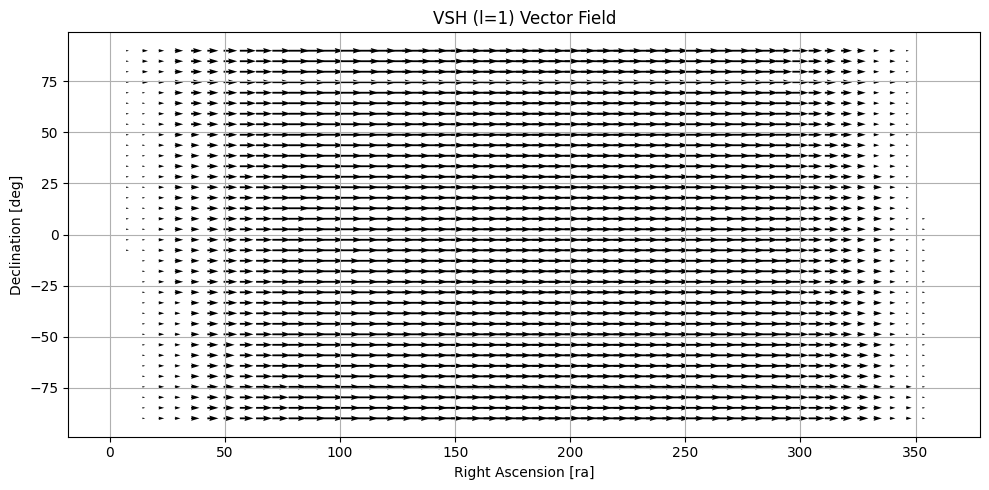

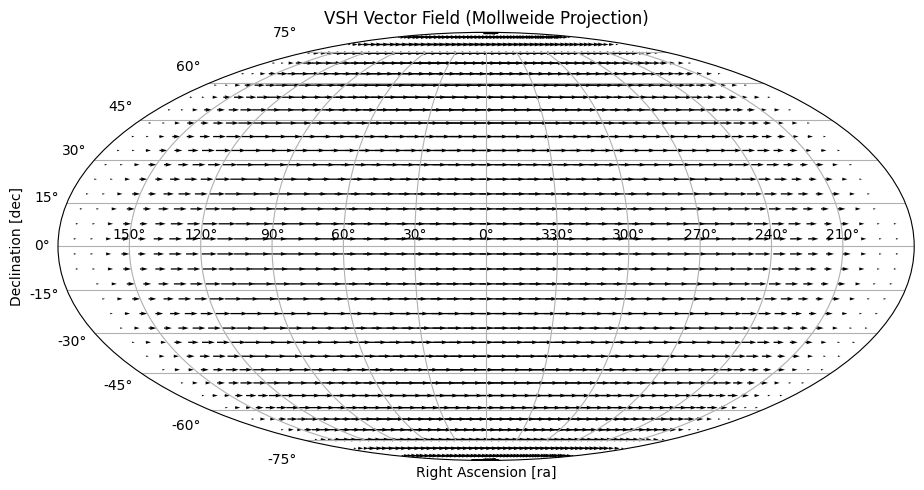

In [7]:
VSH_field_vis(alpha, delta, theta0)

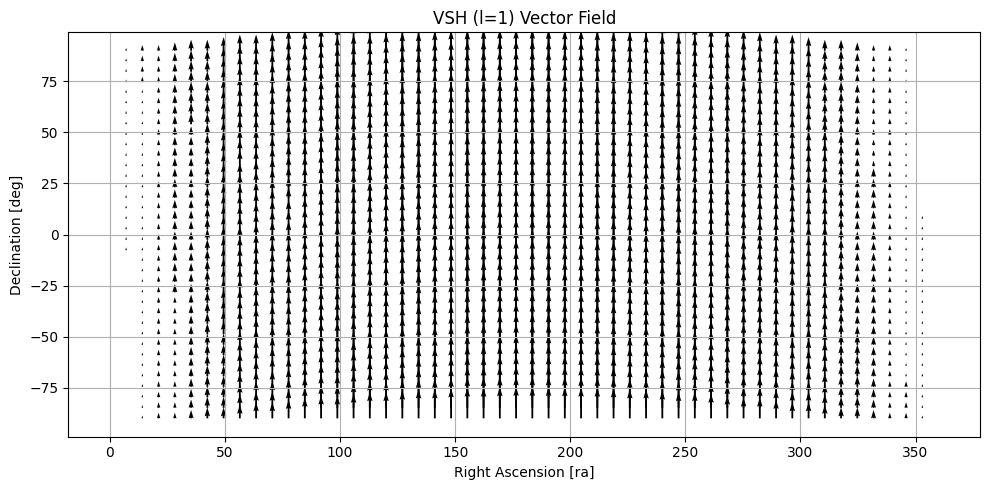

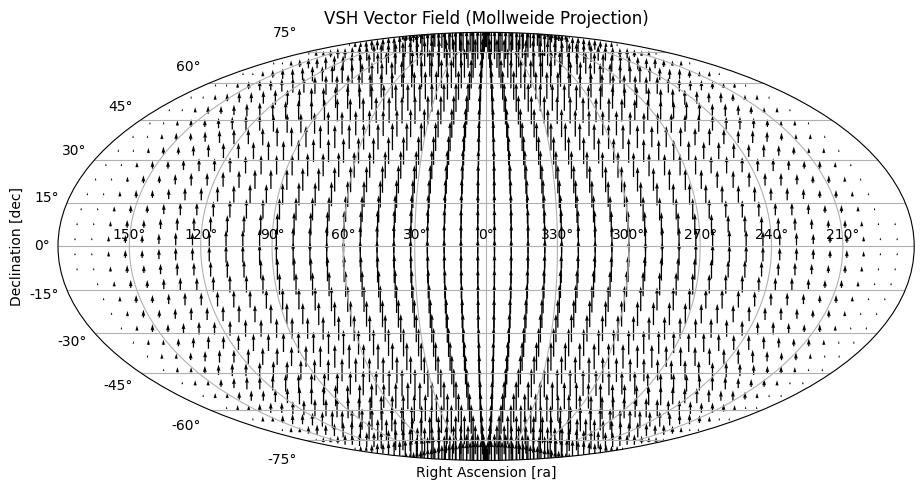

In [8]:
VSH_field_vis(alpha, delta, theta1)

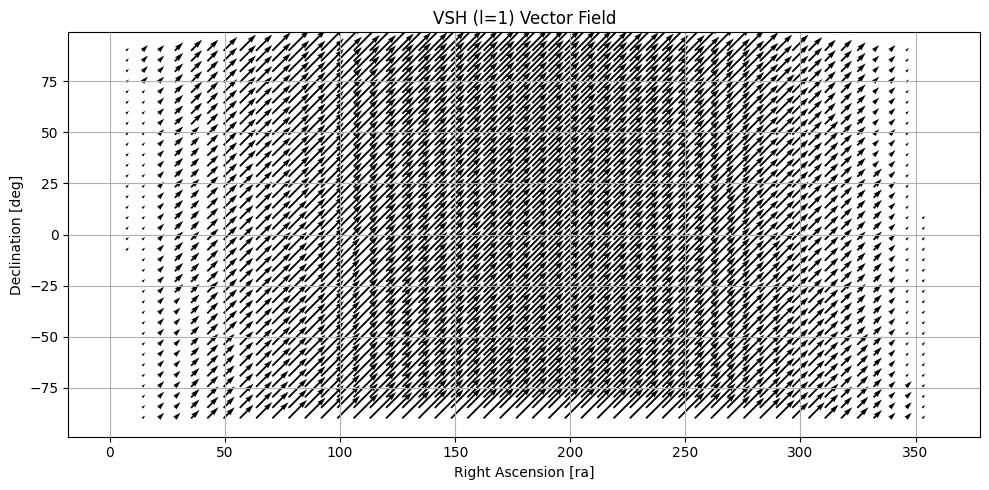

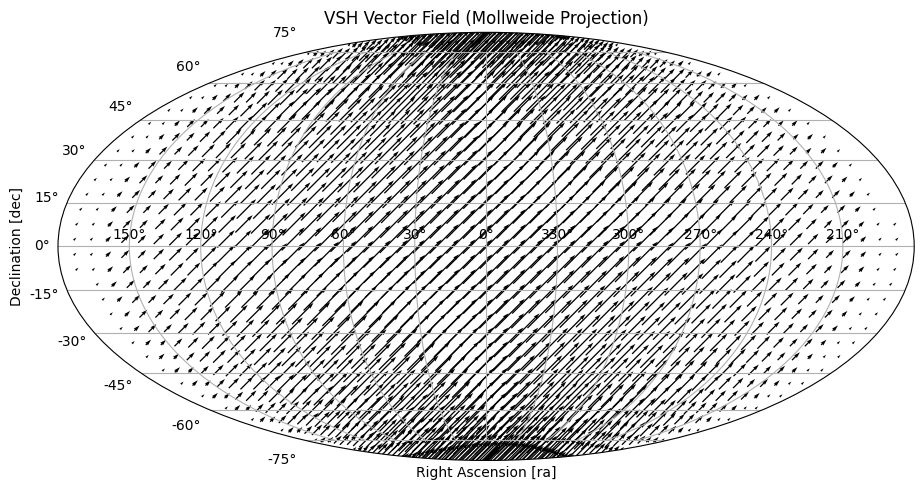

In [9]:
VSH_field_vis(alpha, delta, theta2)